In [2]:
# First let's import the packages we will use in this project
# You can do this all now or as you need them
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None



# Now we need to read in the data

In [3]:
#Read in the data
df = pd.read_csv(r'C:\Users\Kevin\Desktop\PortfolioProjects\PythonProject\movies.csv')
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0


In [35]:
df.isnull().mean().round(2)

name        0.00
rating      0.01
genre       0.00
year        0.00
released    0.00
score       0.00
votes       0.00
director    0.00
writer      0.00
star        0.00
country     0.00
budget      0.28
gross       0.02
company     0.00
runtime     0.00
dtype: float64

In [36]:
df.shape[0] -  df.dropna().shape[0]


2247

In [4]:
df['budget'] = df['budget'].fillna(df['budget'].median())
df['gross'] = df['gross'].fillna(df['gross'].median())


In [5]:
df = df.dropna(subset=['company', 'runtime', 'rating'])

In [39]:
# Data types for our columns
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [6]:
#Change data types for aur columns
df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')


In [7]:
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7655,Legend of Deification,TV-PG,Animation,2020,"October 1, 2020 (United States)",6.6,1300.0,Teng Cheng,NaN,Guangtao Jiang,China,20500000,240663149,Beijing Enlight Pictures,110.0
7656,Tulsa,PG-13,Comedy,2020,"June 3, 2020 (United States)",5.0,294.0,Scott Pryor,Scott Pryor,Scott Pryor,United States,20500000,413378,Pryor Entertainment,120.0
7658,Black Wall Street Burning,R,Drama,2020,"February 7, 2020 (United States)",6.6,35.0,Marcus Brown,Dekoven Riggins,Dan Belcher,United States,5000,20205757,Notis Studio,78.0
7659,I Am Fear,Not Rated,Horror,2020,"March 3, 2020 (United States)",3.4,447.0,Kevin Shulman,Kevin Shulman,Kristina Klebe,United States,20500000,13266,Roxwell Films,87.0


In [8]:
r_year = df['released'].astype(str).str.extract(r'(\d{4})')[0]
comparison = r_year != df['year'].astype(str)
comparison.sum()

1295

In [9]:
#Create correct year column
df['yearcorrect'] = df['released'].astype(str).str.extract(r'(\d{4})')
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7655,Legend of Deification,TV-PG,Animation,2020,"October 1, 2020 (United States)",6.6,1300.0,Teng Cheng,NaN,Guangtao Jiang,China,20500000,240663149,Beijing Enlight Pictures,110.0,2020
7656,Tulsa,PG-13,Comedy,2020,"June 3, 2020 (United States)",5.0,294.0,Scott Pryor,Scott Pryor,Scott Pryor,United States,20500000,413378,Pryor Entertainment,120.0,2020
7658,Black Wall Street Burning,R,Drama,2020,"February 7, 2020 (United States)",6.6,35.0,Marcus Brown,Dekoven Riggins,Dan Belcher,United States,5000,20205757,Notis Studio,78.0,2020
7659,I Am Fear,Not Rated,Horror,2020,"March 3, 2020 (United States)",3.4,447.0,Kevin Shulman,Kevin Shulman,Kristina Klebe,United States,20500000,13266,Roxwell Films,87.0,2020


In [10]:
df = df.sort_values(by = ['gross'], inplace = False, ascending= False)

In [11]:
pd.set_option('display.max_rows', 20)

In [46]:
#Drop duplicates 
df.drop_duplicates()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3394,I Want You,R,Crime,1998,"October 30, 1998 (United Kingdom)",6.1,2900.0,Michael Winterbottom,Eoin McNamee,Rachel Weisz,United Kingdom,20500000,1672,Polygram Filmed Entertainment,87.0,1998
2906,Pusher,Not Rated,Crime,1996,"August 30, 1996 (Denmark)",7.4,37000.0,Nicolas Winding Refn,Jens Dahl,Kim Bodnia,Denmark,20500000,1605,Balboa Entertainment,110.0,1996
3818,"Love, Honor and Obey",R,Comedy,2000,"February 9, 2001 (United States)",6.5,5200.0,Dominic Anciano,Dominic Anciano,Sadie Frost,United Kingdom,20500000,1400,British Broadcasting Corporation (BBC),103.0,2001
7580,Run with the Hunted,Not Rated,Crime,2019,"June 26, 2020 (United States)",5.2,735.0,John Swab,John Swab,Ron Perlman,United States,20500000,682,Roxwell Films,93.0,2020


In [47]:
# Budget high correlation
# company high correlation


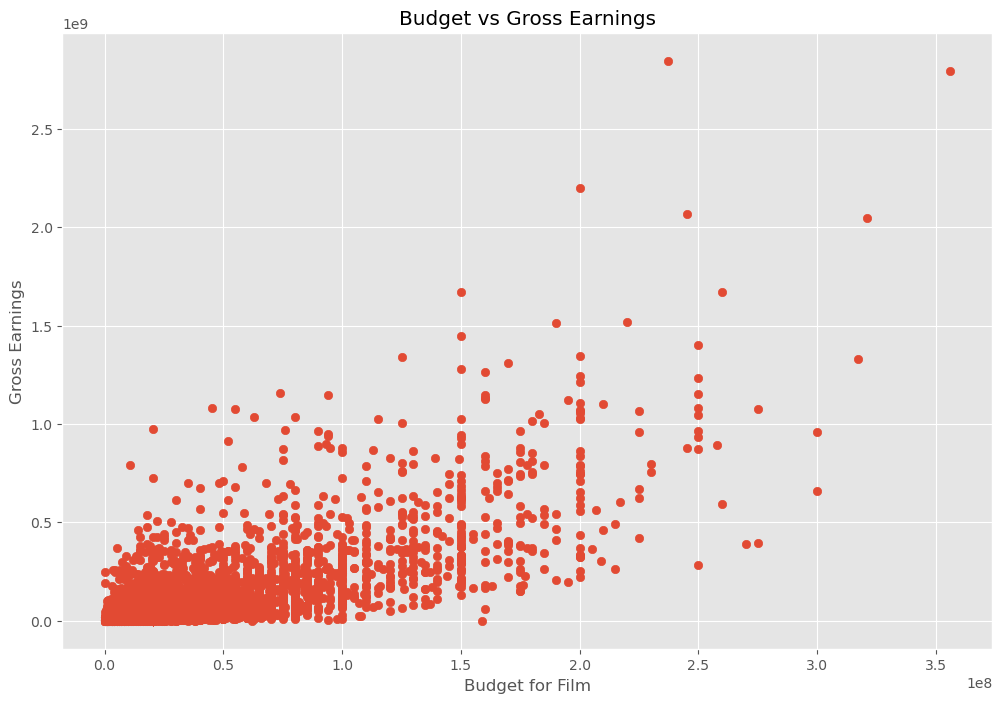

In [12]:
#Scatter plot with budget vs gross


plt.scatter(x=df['budget'], y=df['gross'])

plt.title('Budget vs Gross Earnings')

plt.xlabel('Budget for Film')

plt.ylabel('Gross Earnings')

plt.show()



In [49]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018


In [ ]:
#Let's start looking at correlation

In [56]:
df.corr(numeric_only=True, method='pearson') #pearson, kendall, spearman

,year,score,votes,budget,gross,runtime
year,1.000000,0.102433,0.226707,0.295691,0.262144,0.120940
score,0.102433,1.000000,0.411849,0.062497,0.187491,0.400566
votes,0.226707,0.411849,1.000000,0.460095,0.632230,0.309370
budget,0.295691,0.062497,0.460095,1.000000,0.746285,0.273795
gross,0.262144,0.187491,0.632230,0.746285,1.000000,0.244177
runtime,0.120940,0.400566,0.309370,0.273795,0.244177,1.000000


In [ ]:
# High correlation between budget and gross

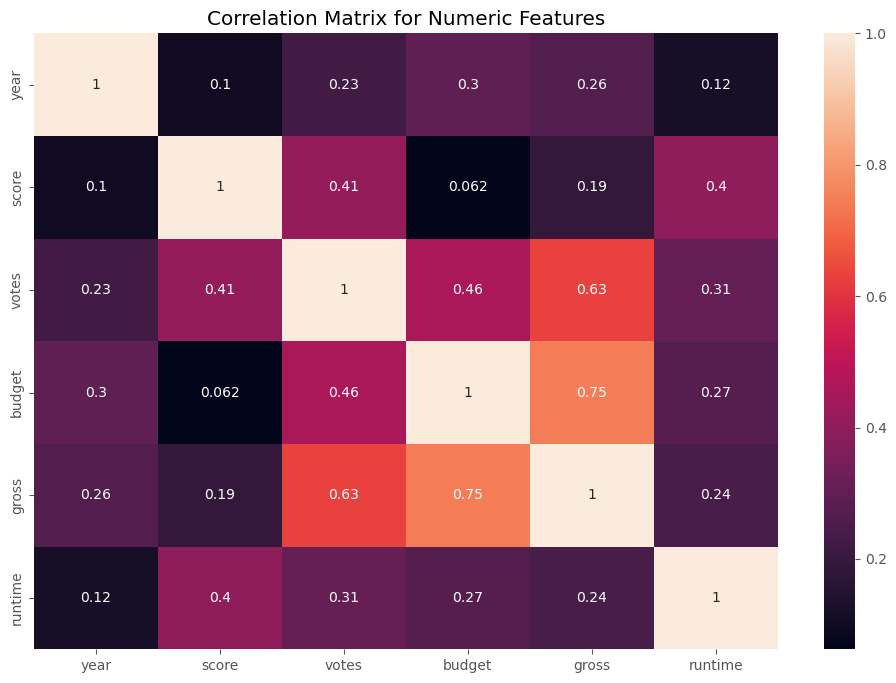

In [61]:
correlation_matrix = df.corr(numeric_only=True, method='pearson')

plt.title('Correlation Matrix for Numeric Features')

plt.xlabel('Movie Feature')

plt.ylabel('Movie Feature')

sns.heatmap(correlation_matrix, annot=True)

plt.show()

In [62]:
#Looks at Company
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018


In [63]:
df_numerized = df

for column in df_numerized.columns:
    if(df_numerized[column].dtypes == 'object'):
        df_numerized[column]=df_numerized[column].astype('category')
        df_numerized[column]=df_numerized[column].cat.codes

df_numerized.head()


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,527,5,0,2009,690,7.8,1100000.0,1137,1757,2285,55,237000000,2847246203,2212,162.0,29
7445,529,5,0,2019,182,8.4,903000.0,160,730,2194,55,356000000,2797501328,1575,181.0,39
3045,6815,5,6,1997,698,7.8,1100000.0,1137,1757,1561,55,200000000,2201647264,2212,194.0,17
6663,5077,5,0,2015,692,7.8,876000.0,1107,2519,508,55,245000000,2069521700,1509,138.0,35
7244,530,5,0,2018,191,8.4,897000.0,160,730,2194,55,321000000,2048359754,1575,149.0,38


In [75]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018


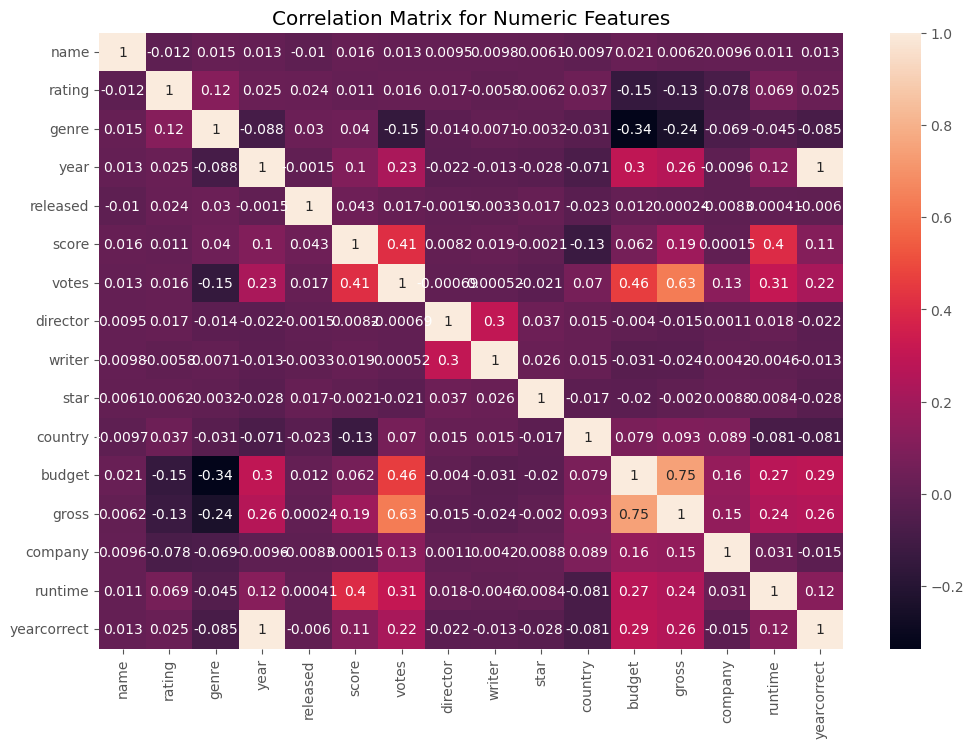

In [76]:
correlation_matrix = df_numerized.corr(numeric_only=True, method='pearson')

plt.title('Correlation Matrix for Numeric Features')

plt.xlabel('Movie Feature')

plt.ylabel('Movie Feature')

sns.heatmap(correlation_matrix, annot=True)

plt.show()

In [77]:
df_numerized.corr()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
name,1.000000,-0.011828,0.015446,0.013432,-0.010458,0.016291,0.013048,0.009521,0.009753,0.006119,-0.009733,0.021282,0.006199,0.009644,0.011063,0.012640
rating,-0.011828,1.000000,0.117591,0.025122,0.024339,0.011455,0.015625,0.017129,-0.005785,0.006180,0.036579,-0.146340,-0.128550,-0.077736,0.068548,0.025306
genre,0.015446,0.117591,1.000000,-0.088133,0.030436,0.040084,-0.148433,-0.013700,0.007061,-0.003182,-0.031141,-0.335549,-0.240481,-0.068826,-0.044637,-0.084523
year,0.013432,0.025122,-0.088133,1.000000,-0.001532,0.102433,0.226707,-0.022229,-0.013003,-0.027652,-0.070738,0.295691,0.262144,-0.009556,0.120940,0.997468
released,-0.010458,0.024339,0.030436,-0.001532,1.000000,0.043053,0.016958,-0.001546,-0.003263,0.017426,-0.022594,0.011994,0.000245,-0.008264,0.000411,-0.006038
score,0.016291,0.011455,0.040084,0.102433,0.043053,1.000000,0.411849,0.008156,0.018875,-0.002092,-0.130071,0.062497,0.187491,0.000149,0.400566,0.109904
votes,0.013048,0.015625,-0.148433,0.226707,0.016958,0.411849,1.000000,-0.000690,0.000524,-0.021103,0.069692,0.460095,0.632230,0.129823,0.309370,0.222129
director,0.009521,0.017129,-0.013700,-0.022229,-0.001546,0.008156,-0.000690,1.000000,0.296991,0.037346,0.014695,-0.004018,-0.014587,0.001143,0.017535,-0.021557
writer,0.009753,-0.005785,0.007061,-0.013003,-0.003263,0.018875,0.000524,0.296991,1.000000,0.025912,0.015316,-0.031026,-0.023739,0.004234,-0.004554,-0.012702
star,0.006119,0.006180,-0.003182,-0.027652,0.017426,-0.002092,-0.021103,0.037346,0.025912,1.000000,-0.017224,-0.019888,-0.002018,0.008792,0.008421,-0.028056


In [81]:
correlation_mat = df_numerized.corr()
corr_pairs = correlation_mat.unstack()
corr_pairs.head(20)

name    name           1.000000
        rating        -0.011828
        genre          0.015446
        year           0.013432
        released      -0.010458
        score          0.016291
        votes          0.013048
        director       0.009521
        writer         0.009753
        star           0.006119
        country       -0.009733
        budget         0.021282
        gross          0.006199
        company        0.009644
        runtime        0.011063
        yearcorrect    0.012640
rating  name          -0.011828
        rating         1.000000
        genre          0.117591
        year           0.025122
dtype: float64

In [83]:
sorted_pairs = corr_pairs.sort_values()
sorted_pairs.head(20)

genre        budget        -0.335549
budget       genre         -0.335549
genre        gross         -0.240481
gross        genre         -0.240481
votes        genre         -0.148433
genre        votes         -0.148433
rating       budget        -0.146340
budget       rating        -0.146340
country      score         -0.130071
score        country       -0.130071
rating       gross         -0.128550
gross        rating        -0.128550
genre        year          -0.088133
year         genre         -0.088133
yearcorrect  genre         -0.084523
genre        yearcorrect   -0.084523
country      runtime       -0.081452
runtime      country       -0.081452
country      yearcorrect   -0.080849
yearcorrect  country       -0.080849
dtype: float64

In [86]:
high_corr = sorted_pairs[(sorted_pairs) > 0.5]
high_corr.head(20)

gross        votes          0.632230
votes        gross          0.632230
gross        budget         0.746285
budget       gross          0.746285
yearcorrect  year           0.997468
year         yearcorrect    0.997468
name         name           1.000000
company      company        1.000000
gross        gross          1.000000
budget       budget         1.000000
country      country        1.000000
star         star           1.000000
writer       writer         1.000000
director     director       1.000000
votes        votes          1.000000
score        score          1.000000
released     released       1.000000
year         year           1.000000
genre        genre          1.000000
rating       rating         1.000000
dtype: float64

In [ ]:
# Votes and budget  have the highest correlation to grass earnings
#company has low correlation